In [ ]:
!git clone https://github.com/amueller/introduction_to_ml_with_python
%cd /content/introduction_to_ml_with_python
%matplotlib inline
from preamble import *

Cloning into 'introduction_to_ml_with_python'...
remote: Enumerating objects: 453, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 453 (delta 4), reused 7 (delta 2), pack-reused 440
Receiving objects: 100% (453/453), 182.02 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (193/193), done.
/content/introduction_to_ml_with_python


Find the reference: Chapter 2.3.2 in the textbook

# k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm.

Building the model consists only of storing the training dataset.

To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

## k-Nearest Neighbors classification

In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for.

The prediction is then simply the known output for this training point.

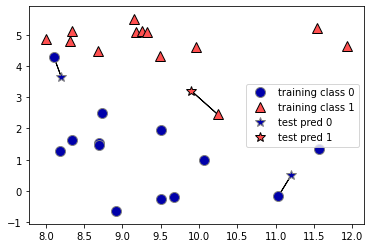

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Here, we added three new data points, shown as stars. For each of them, we marked the closest point in the training set. The prediction of the one-nearest-neighbor algorithm is the label of that point (shown by the color of the cross).

Instead of considering only the closest neighbor, we can also consider an arbitrary number, k, of neighbors

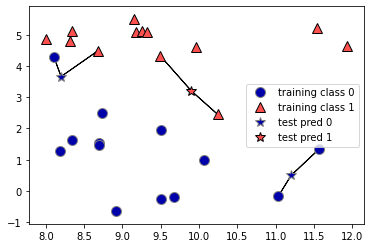

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

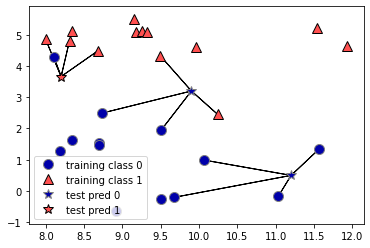

In [ ]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

Here is the example code to apply the k-nearest neighbors algorithm using scikit-learn.

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(19, 2)
(7, 2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [ ]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


For two-dimensional datasets, we can also illustrate the prediction for all possible test points in the xy-plane.

We color the plane according to the class that would be assigned to a point in this region.

This lets us view the decision boundary, which is the divide between where the algorithm assigns class 0 versus where it assigns class 1.

The following code produces the visualizations of the decision boundaries for one, three, and nine neighbors:

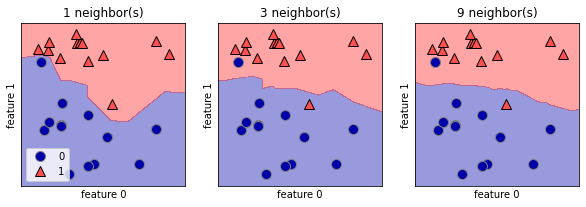

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely.

Considering more and more neighbors leads to a smoother decision boundary.

A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity

Let’s investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier. We will do this on the real-world Breast Cancer dataset.

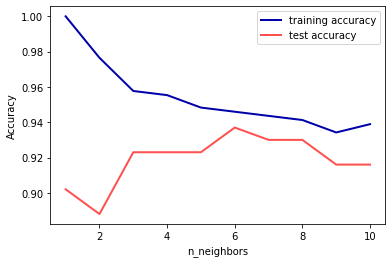

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points.

In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. C

hoosing the right distance measure is somewhat beyond the scope of this book (also for this course). By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments.

Using this algorithm is a good baseline method to try before considering more advanced techniques.

Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow.

Consider building a 5-dector in MNIST data using KNN algorithm. What's the pros and cons?